# Classificação

In [108]:
import numpy as np
from sklearn import metrics as mt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import datasets as dt
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from scipy import stats
import warnings

In [109]:
X_training = pd.read_csv('X_training.csv')
y_training = pd.read_csv('y_training.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
X_validation = pd.read_csv('X_validation.csv')
y_validation = pd.read_csv('y_validation.csv')

In [110]:
features = ['id','customer_type', 'age', 'class','flight_distance','inflight_wifi_service',
            'departure_arrival_time_convenient','departure_arrival_time_convenient', 'ease_of_online_booking',
           'gate_location','food_and_drink','online_boarding', 'seat_comfort','inflight_entertainment',
            'on_board_service','leg_room_service','baggage_handling','checkin_service','inflight_service',
            'cleanliness','departure_delay_in_minutes', 'arrival_delay_in_minutes','gender_Female','gender_Male',
            'type_of_travel_business_travel' ,'type_of_travel_personal_travel'
           ]
label = ['0']

In [111]:
# Preparação dos dados de treino
X_trainingC = X_training.loc[:, features]
y_training = y_training.loc[:,label].values.ravel()

In [112]:
X_testC = X_test.loc[:,features]
y_test = y_test.loc[:,label].values.ravel()

In [113]:
X_validationC = X_validation.loc[:,features]
y_validation = y_validation.loc[:,label].values.ravel()

In [114]:
y_training

array([1, 1, 0, ..., 1, 0, 0])

In [172]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_trainingC, y_training)

KNeighborsClassifier(n_neighbors=1)

In [173]:
def mode_modificada(a, axis=0):
    return stats.mode(a, axis=axis, keepdims=True)

In [174]:
y_pred = knn_classifier.predict(X_testC)

In [175]:
mt.confusion_matrix(y_test, y_pred)

array([[10292,  4236],
       [ 4103,  7262]])

In [179]:
mt.accuracy_score(y_test, y_pred)

0.6779438458270575

In [171]:
mt.precision_score(y_test, y_pred)

0.6107391537225495

In [144]:
mt.recall_score(y_test, y_pred)

0.6117905851297845

In [178]:
mt.f1_score(y_test, y_pred)

0.6352622140576477

In [69]:
#print(classification_report(y_training, y_pred))
#print('Sobre os dados de treino')

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     41087
           1       0.76      0.73      0.74     31428

    accuracy                           0.78     72515
   macro avg       0.78      0.78      0.78     72515
weighted avg       0.78      0.78      0.78     72515

Sobre os dados de treino


In [81]:
#print(classification_report(y_test,y_pred ))
#print('Sobre os dados de Validação')

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     14528
           1       0.63      0.60      0.62     11365

    accuracy                           0.67     25893
   macro avg       0.66      0.66      0.66     25893
weighted avg       0.67      0.67      0.67     25893

Sobre os dados de Validação


In [91]:
#print(classification_report(y_validation,y_pred ))
#print('Sobre os dados de test')

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     17610
           1       0.63      0.60      0.62     13469

    accuracy                           0.68     31079
   macro avg       0.67      0.67      0.67     31079
weighted avg       0.67      0.68      0.67     31079

Sobre os dados de test


# Elbow + Cross Validation

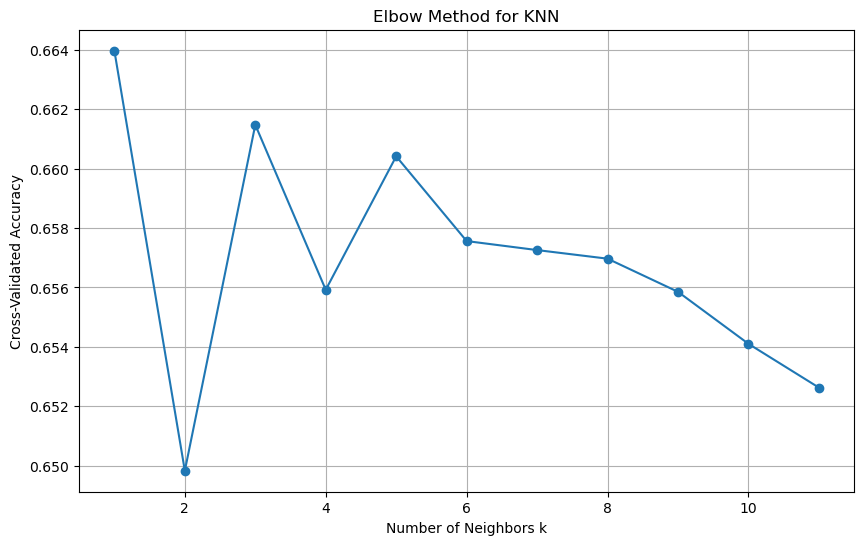

O melhor valor de k é 1 com acurácia média de 0.6640


In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from scipy import stats
import warnings

# Remover aviso específico
warnings.filterwarnings("ignore", category=FutureWarning, message=".*default value of `keepdims` will become False.*")

# Transformar y_training em um array unidimensional
y_training_1d = y_training.ravel()

# Definindo a lista de valores de k a serem testados
k_values = np.arange(1, 12, 1)
accuracy = []

# Loop através dos valores de k
for k in k_values: 
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Avaliação do modelo usando validação cruzada
    scores = cross_val_score(knn_classifier, X_trainingC, y_training_1d, cv=5, scoring='accuracy')
    acc = scores.mean()
    accuracy.append(acc)

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy, marker='o')
plt.title('Elbow Method for KNN')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Encontrar o melhor valor de k
best_k = k_values[np.argmax(accuracy)]
print(f"O melhor valor de k é {best_k} com acurácia média de {max(accuracy):.4f}")